In [2]:
import numpy as np
import torch
import torch.nn as nn

import torch.nn.functional as F

import matplotlib.pyplot as plt


In [3]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(100, 100)
        
        self.fc1 = nn.Linear(100, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 100)
        
        self.output = nn.Linear(100, 2)
        
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.output(x)

In [4]:
model = Model()
print(model)

Model(
  (input): Linear(in_features=100, out_features=100, bias=True)
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=2, bias=True)
)


There are 40200 weights parameters
There are 402 biases parameters


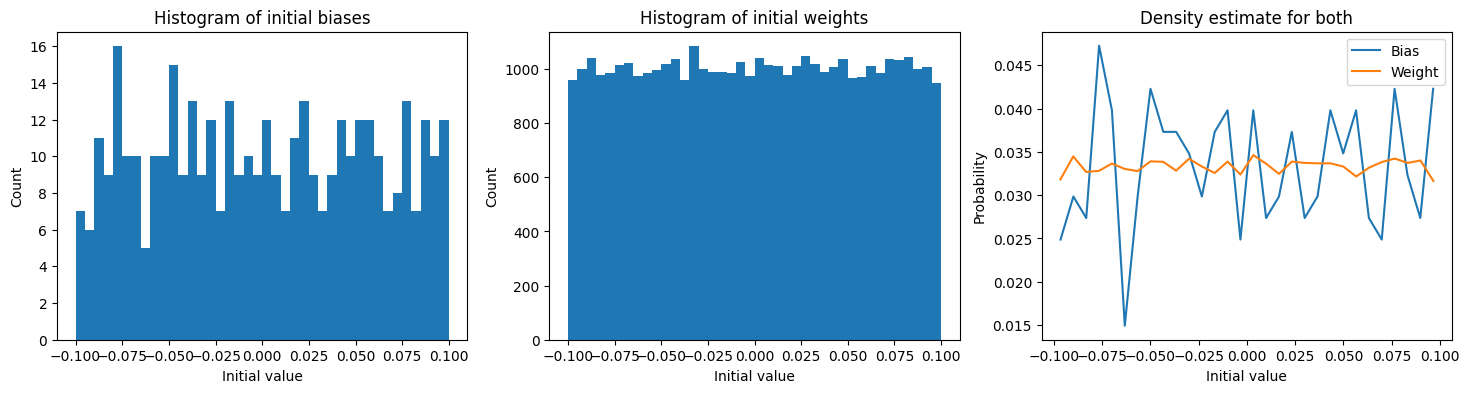

In [8]:
all_weights = np.array([])
all_biases = np.array([])

for p in model.named_parameters():
    if 'bias' in p[0]:
        all_biases = np.concatenate((all_biases, p[1].data.numpy().flatten()), axis=0)
    elif 'weight' in p[0]:
        all_weights = np.concatenate((all_weights, p[1].data.numpy().flatten()), axis=0)   
        
print(f"There are {len(all_weights)} weights parameters")
print(f"There are {len(all_biases)} biases parameters")

fig, ax = plt.subplots(1,3,figsize=(18,4))

ax[0].hist(all_biases, 40)
ax[0].set_title('Histogram of initial biases')

ax[1].hist(all_weights, 40)
ax[1].set_title('Histogram of initial weights')

yB, xB = np.histogram(all_biases, 30)
yW, xW = np.histogram(all_weights, 30)

ax[2].plot((xB[1:]+xB[:-1])/2,yB/np.sum(yB),label='Bias')
ax[2].plot((xW[1:]+xW[:-1])/2,yW/np.sum(yW),label='Weight')
ax[2].set_title('Density estimate for both')
ax[2].legend()

for i in range(3):
    ax[i].set_xlabel('Initial value')
    ax[i].set_ylabel('Count')
    
ax[2].set_ylabel('Probability')

plt.show()


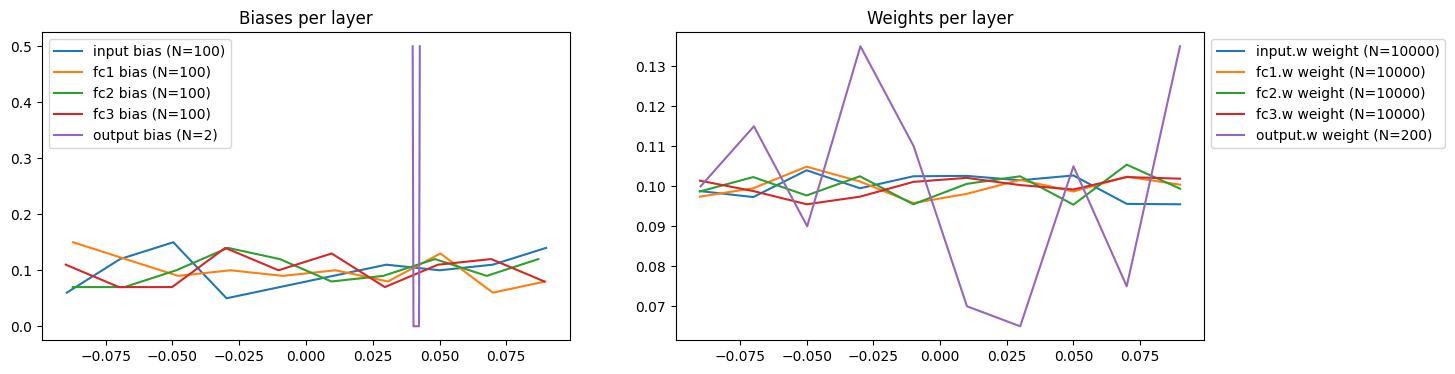

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for p in model.named_parameters():
    these_data = p[1].data.numpy().flatten()
    y,x = np.histogram(these_data, 10)
    
    if 'bias' in p[0]:
        ax[0].plot((x[1:]+x[:-1])/2,y/np.sum(y), label=f"{p[0][:-5]} bias (N={len(these_data)})")
        
    if 'weight' in p[0]:
        ax[1].plot((x[1:]+x[:-1])/2,y/np.sum(y), label=f"{p[0][:-5]} weight (N={len(these_data)})")
        
ax[0].set_title('Biases per layer')
ax[0].legend()
ax[1].set_title('Weights per layer')
ax[1].legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

In [10]:
print(model.output.bias.data)

tensor([0.0398, 0.0428])


In [12]:
bias_range = [torch.min(model.fc1.bias.data).item(), torch.max(model.fc1.bias.data).item()]
bias_count = len(model.fc1.bias.data)

sigma = np.sqrt(1/bias_count)
print(f"Theoretical sigma = "+str(sigma))
print(f"Empirical sigma = "+str(bias_range))

Theoretical sigma = 0.1
Empirical sigma = [-0.09701325744390488, 0.09943564236164093]


In [16]:
model = Model()

for p in model.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

There are 40200 weights parameters
There are 402 biases parameters


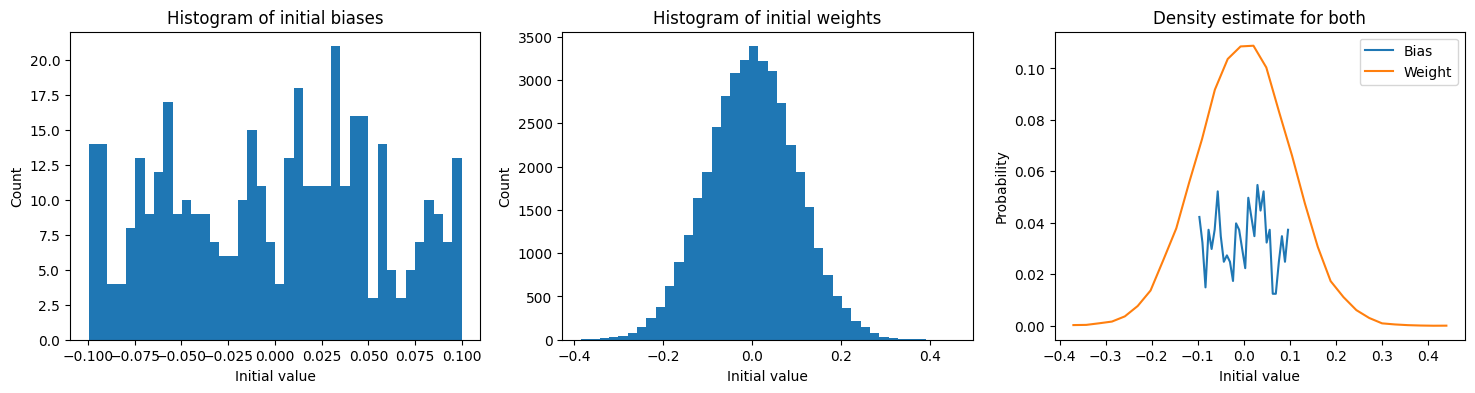

In [17]:
all_weights = np.array([])
all_biases = np.array([])

for p in model.named_parameters():
    if 'bias' in p[0]:
        all_biases = np.concatenate((all_biases, p[1].data.numpy().flatten()), axis=0)
    elif 'weight' in p[0]:
        all_weights = np.concatenate((all_weights, p[1].data.numpy().flatten()), axis=0)   
        
print(f"There are {len(all_weights)} weights parameters")
print(f"There are {len(all_biases)} biases parameters")

fig, ax = plt.subplots(1,3,figsize=(18,4))

ax[0].hist(all_biases, 40)
ax[0].set_title('Histogram of initial biases')

ax[1].hist(all_weights, 40)
ax[1].set_title('Histogram of initial weights')

yB, xB = np.histogram(all_biases, 30)
yW, xW = np.histogram(all_weights, 30)

ax[2].plot((xB[1:]+xB[:-1])/2,yB/np.sum(yB),label='Bias')
ax[2].plot((xW[1:]+xW[:-1])/2,yW/np.sum(yW),label='Weight')
ax[2].set_title('Density estimate for both')
ax[2].legend()

for i in range(3):
    ax[i].set_xlabel('Initial value')
    ax[i].set_ylabel('Count')
    
ax[2].set_ylabel('Probability')

plt.show()

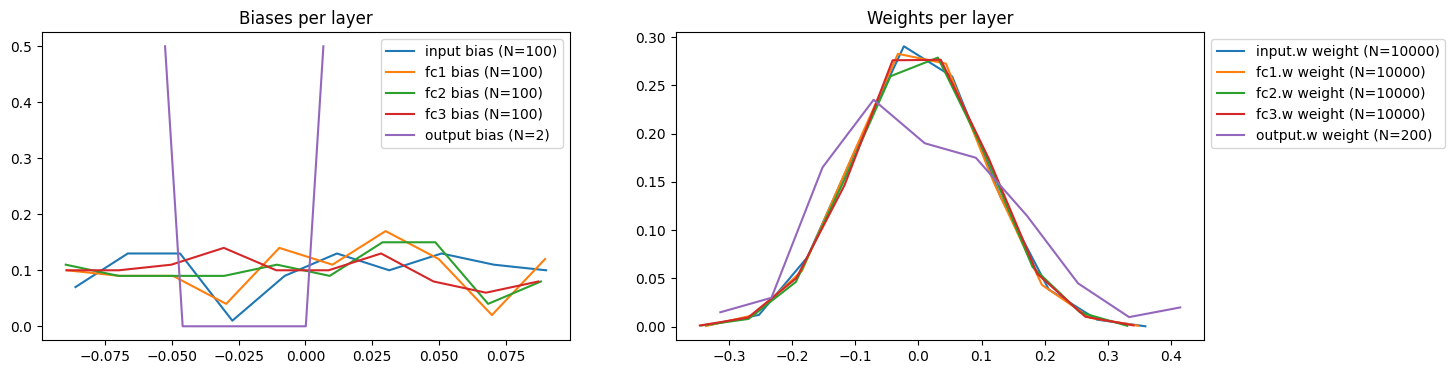

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for p in model.named_parameters():
    these_data = p[1].data.numpy().flatten()
    y,x = np.histogram(these_data, 10)
    
    if 'bias' in p[0]:
        ax[0].plot((x[1:]+x[:-1])/2,y/np.sum(y), label=f"{p[0][:-5]} bias (N={len(these_data)})")
        
    if 'weight' in p[0]:
        ax[1].plot((x[1:]+x[:-1])/2,y/np.sum(y), label=f"{p[0][:-5]} weight (N={len(these_data)})")
        
ax[0].set_title('Biases per layer')
ax[0].legend()
ax[1].set_title('Weights per layer')
ax[1].legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

In [19]:
weight_var = torch.var(model.fc1.weight.data.flatten()).item()
weight_count = len(model.fc1.weight.data)

sigma2 = 2 / (weight_count+weight_count)

print(f"Theoretical sigma = "+str(sigma2))
print(f"Empirical sigma = "+str(weight_var))

Theoretical sigma = 0.01
Empirical sigma = 0.009817659854888916
